In [52]:
import geopandas as gpd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import mapclassify as mc
from matplotlib import colors
from matplotlib import colormaps

In [ ]:
# read the world geometry data exported form Task 1
data = gpd.read_file('Task-2-Data/Task-2-Exported-Geomeries.gpkg')
# get the GDP per capita
data['GDP per capita']= 1000000* data['GDP_MD'] / data['POP_EST']
# replace nan with 0
data['GDP per capita'] = data['GDP per capita'].fillna(0)
# define the crs
crs= ccrs.EckertIV()
# project the data
data=data.to_crs(crs)

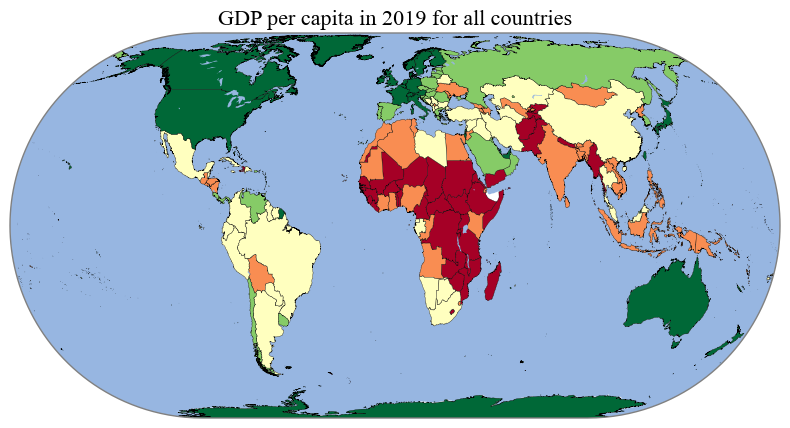

In [74]:
# establish a canvas
fig = plt.figure(figsize=(10, 5))
# set up and ax object
ax = fig.add_subplot(1, 1, 1, projection=crs)

# Set the extent and crs of the map
ax.set_global()
# Set parameters of the ax
for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('grey')

# using mapclassify to classify the data to be 5 classes using Quantiles
class_number = 5
classifier = mc.Quantiles(data['GDP per capita'], k=class_number)
classifications = np.array(classifier.yb)

# plot the classification
cmap = plt.get_cmap('RdYlGn', class_number)
for i in range(class_number):
    subset = data[classifications == i]
    ax.add_geometries(subset['geometry'], crs, facecolor=cmap(i), edgecolor='black', linewidth=0.25)

# add the ocean and lakes
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)

#set title
ax.set_title("GDP per capita in 2019 for all countries")
ax.title.set_fontname('times new roman')
ax.title.set_fontsize(16)


# 显示地图
plt.show()

In [64]:


# Get the first color from the colormap
cmap.colors[0]


(0.4980392156862745, 0.788235294117647, 0.4980392156862745)